In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols 

# Reading Wind Generation Data


In [ ]:
act_load = pd.read_csv('C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Actual Generation per Production Type_201901010000-202001010000.csv',sep=',')
#act_load

In [ ]:
act_load

In [ ]:
# Profiling of the wind generation data

In [ ]:
prof_wind_report = ProfileReport(df)

In [ ]:
prof_wind_report.to_file(output_file='wind_report.html')

In [ ]:
act_load=act_load.drop(columns='Area')

In [ ]:
act_load['MTU'] = act_load['MTU'].map(lambda x: x.rstrip(' (CET)'))

In [ ]:
act_load[['Start_date','End_date']] = act_load.MTU.str.split("-",expand=True,)

In [ ]:
act_load

In [ ]:
act_load.info()

In [ ]:
#act_load.describe()

In [ ]:
df_test=pd.DataFrame(data=act_load)

In [ ]:
df_test['month']=pd.to_datetime(df_test['Start_date']).dt.month
df_test['week']=pd.to_datetime(df_test['Start_date']).dt.week
df_test['day']=pd.to_datetime(df_test['Start_date']).dt.day_name()


In [ ]:
df_test

In [ ]:
act_load

In [ ]:
df = pd.DataFrame(data=act_load)

In [ ]:
#act_load['MTU']=pd.to_datetime(act_load['MTU'], utc =True, infer_datetime_format=True)
df['Start_date'] = pd.to_datetime(df['Start_date'], utc=True, infer_datetime_format=True)
df

In [ ]:
df = df.set_index('Start_date')

In [ ]:
df

In [ ]:
df.drop(columns={'MTU','End_date'}, inplace=True)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

In [ ]:
df

In [ ]:
# Finding NaNs and duplicates values.

print('There are',df.isnull().values.sum(), 'null values')

print('There are',df.duplicated(keep='first').values.sum(), 'duplicate values')

In [ ]:
# Find NaNs values in each column

df.isnull().sum(axis=0)

In [ ]:
# delete total null columns
df.dropna(how='all', axis=1,inplace=True)

In [ ]:
df.isnull().sum(axis=0)

In [ ]:
def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

In [ ]:
ax = plot_series(df, column='Other  - Actual Aggregated [MW]', ylabel='Wind Onshore (MW)',
                 title='Wind Onshore (First 2 weeks - Original)', end=24*30*5)
plt.show()

In [ ]:
df_imp = df.interpolate(method ='linear',limit_direction ='both', axis = 1)

In [ ]:
df_imp.isnull().sum()

In [ ]:
# df_imp[df_imp.isnull().any(axis=1)]

In [ ]:
# Converting to datatype of the df to float as all data hold numeric value.

# def convert_float(df, convert_from, convert_to):
#     cols = df.select_dtypes(include=[convert_from]).columns
#     for col in cols:
#         df[col] = df[col].values.astype(convert_to)
#     return df

In [ ]:
# ! pip install pandas-profiling

In [ ]:
df_float.info()

In [ ]:
df_new = df.resample('D').sum().round(2)
df_new


# Reading Wind Forecast Data.


In [ ]:
wf_load = pd.read_csv('C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Wind_Forecast/Generation Forecasts for Wind and Solar_201901010000-202001010000.csv',sep=',')
#wf_load

In [ ]:
wf_load

In [ ]:
wf_df = pd.DataFrame(data = wf_load)

In [ ]:
wf_df.rename(columns={'MTU (CET)':'MTU'},inplace=True)

In [ ]:
wf_df[['Start_date','End_date']] = wf_df.MTU.str.split("-",expand=True,)

In [ ]:
wf_df.info()

In [ ]:
wf_df['Start_date'] = pd.to_datetime(wf_df['Start_date'], utc=True, infer_datetime_format=True)


In [ ]:
wf_df = wf_df.set_index('Start_date')
wf_df

In [ ]:
wf_df.drop(columns={'MTU','End_date'}, inplace=True)

In [ ]:
wf_df = wf_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
wf_df.info()

In [ ]:
# Finding NaNs and duplicates values.

print('There are',wf_df.isnull().values.sum(), 'null values')

print('There are',wf_df.duplicated(keep='first').values.sum(), 'duplicate values')

In [ ]:
wf_df.isnull().sum()

In [ ]:
# delete total null columns
wf_df.dropna(how='all', axis=1,inplace=True)

In [ ]:
wf_df.isnull().sum()

In [ ]:
wf_df = wf_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [ ]:
wf_df.isnull().sum()

In [ ]:
# resampling data to collect daily data;
wf_df_new = wf_df.resample('D').sum().round(2)
wf_df_new

In [ ]:
# del_df=pd.concat([df_new, wf_df_new], axis=1)

# Reading Interconnector EWIC data :

In [ ]:
ic_load = pd.read_csv('C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Interconnector/Cross-Border Physical Flow_201901010000-202001010000.csv',sep=',')
ic_load

In [ ]:
ic_df = pd.DataFrame(data = ic_load)

In [ ]:
ic_df.rename(columns={'Time (CET)':'MTU'},inplace=True)

In [ ]:
ic_df[['Start_date','End_date']] = ic_df.MTU.str.split("-",expand=True,)

In [ ]:
ic_df.info()

In [ ]:
ic_df['Start_date'] = pd.to_datetime(ic_df['Start_date'], utc=True, infer_datetime_format=True)

In [ ]:
ic_df = ic_df.set_index('Start_date')
ic_df

In [ ]:
ic_df.drop(columns={'MTU','End_date'}, inplace=True)

In [ ]:
ic_df = ic_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
ic_df.info()

In [ ]:
# Finding NaNs and duplicates values.

print('There are',ic_df.isnull().values.sum(), 'null values')

print('There are',ic_df.duplicated(keep='first').values.sum(), 'duplicate values')


In [ ]:
ic_df.isnull().sum()

In [ ]:
# delete total null columns
ic_df.dropna(how='all', axis=1,inplace=True)

In [ ]:
ic_df = ic_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [ ]:
ic_df.isnull().sum()

In [ ]:
plt.plot(ic_df_new['CTA|National Grid > CTA|IE [MW]'])

In [ ]:
# ax = plot_series(ic_df, column='CTA|National Grid > CTA|IE [MW]', ylabel='Wind Onshore (MW)',
#                  title='Wind Onshore (First 2 weeks - Original)', end=24*7*8)
# plt.show()

In [ ]:
# resampling data to collect daily data;
ic_df_new = ic_df.resample('D').sum().round(2)
ic_df_new

# Reading Day Ahead price

In [ ]:
#dap = pd.read_csv('C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Day Ahead Power Price/Day-ahead Prices_201901010000-202001010000.csv',sep=',')
dap

In [104]:
dap = pd.concat(map(pd.read_csv, ['C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Day Ahead Power Price/Day-ahead Prices_201801010000-201901010000.csv',
                                 'C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Day Ahead Power Price/Day-ahead Prices_201901010000-202001010000.csv',
                                 'C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Day Ahead Power Price/Day-ahead Prices_202001010000-202101010000.csv']))

In [105]:
dap

,MTU (CET),Day-ahead Price [EUR/MWh]
0,01.01.2018 00:00 - 01.01.2018 01:00,55.09
1,01.01.2018 01:00 - 01.01.2018 02:00,55.08
2,01.01.2018 02:00 - 01.01.2018 03:00,39.38
3,01.01.2018 03:00 - 01.01.2018 04:00,38.56
4,01.01.2018 04:00 - 01.01.2018 05:00,38.56
...,...,...
8780,31.12.2020 19:00 - 31.12.2020 20:00,-
8781,31.12.2020 20:00 - 31.12.2020 21:00,-
8782,31.12.2020 21:00 - 31.12.2020 22:00,-
8783,31.12.2020 22:00 - 31.12.2020 23:00,-


In [106]:
dap[['Start_date','End_date']] = dap['MTU (CET)'].str.split("-",expand=True,)

In [107]:
dap.columns

Index(['MTU (CET)', 'Day-ahead Price [EUR/MWh]', 'Start_date', 'End_date'], dtype='object')

In [108]:
dap_df = pd.DataFrame(data=dap)
dap_df

,MTU (CET),Day-ahead Price [EUR/MWh],Start_date,End_date
0,01.01.2018 00:00 - 01.01.2018 01:00,55.09,01.01.2018 00:00,01.01.2018 01:00
1,01.01.2018 01:00 - 01.01.2018 02:00,55.08,01.01.2018 01:00,01.01.2018 02:00
2,01.01.2018 02:00 - 01.01.2018 03:00,39.38,01.01.2018 02:00,01.01.2018 03:00
3,01.01.2018 03:00 - 01.01.2018 04:00,38.56,01.01.2018 03:00,01.01.2018 04:00
4,01.01.2018 04:00 - 01.01.2018 05:00,38.56,01.01.2018 04:00,01.01.2018 05:00
...,...,...,...,...
8780,31.12.2020 19:00 - 31.12.2020 20:00,-,31.12.2020 19:00,31.12.2020 20:00
8781,31.12.2020 20:00 - 31.12.2020 21:00,-,31.12.2020 20:00,31.12.2020 21:00
8782,31.12.2020 21:00 - 31.12.2020 22:00,-,31.12.2020 21:00,31.12.2020 22:00
8783,31.12.2020 22:00 - 31.12.2020 23:00,-,31.12.2020 22:00,31.12.2020 23:00


In [258]:
dap_df['Start_date'] = pd.to_datetime(dap_df['Start_date'], utc=True, infer_datetime_format=True)
dap_df = dap_df.set_index('Start_date')


KeyError: 'Start_date'

In [110]:
dap_df

,MTU (CET),Day-ahead Price [EUR/MWh],End_date
Start_date,,,
2018-01-01 00:00:00+00:00,01.01.2018 00:00 - 01.01.2018 01:00,55.09,01.01.2018 01:00
2018-01-01 01:00:00+00:00,01.01.2018 01:00 - 01.01.2018 02:00,55.08,01.01.2018 02:00
2018-01-01 02:00:00+00:00,01.01.2018 02:00 - 01.01.2018 03:00,39.38,01.01.2018 03:00
2018-01-01 03:00:00+00:00,01.01.2018 03:00 - 01.01.2018 04:00,38.56,01.01.2018 04:00
2018-01-01 04:00:00+00:00,01.01.2018 04:00 - 01.01.2018 05:00,38.56,01.01.2018 05:00
...,...,...,...
2020-12-31 19:00:00+00:00,31.12.2020 19:00 - 31.12.2020 20:00,-,31.12.2020 20:00
2020-12-31 20:00:00+00:00,31.12.2020 20:00 - 31.12.2020 21:00,-,31.12.2020 21:00
2020-12-31 21:00:00+00:00,31.12.2020 21:00 - 31.12.2020 22:00,-,31.12.2020 22:00


In [130]:
dap_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26307 entries, 2018-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MTU (CET)                  26307 non-null  object
 1   Day-ahead Price [EUR/MWh]  26184 non-null  object
 2   End_date                   26307 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [131]:
dap_df.drop(columns='MTU (CET)', inplace=True)
dap_df.drop(columns='End_date', inplace=True)

In [16]:
# dap_df.replace('N/A', 0, inplace=True)
# dap_df.replace('',0, inplace=True)
# dap_df['Day-ahead Price [EUR/MWh]'].fillna(0, inplace = True)

In [132]:
# Decomposing the Electricity price 
dap_df.isnull().values.sum()

123

In [133]:
dap_df = dap_df.apply(pd.to_numeric, errors='coerce')

In [134]:
dap_df = dap_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [135]:
dap_df.isna().values.sum()
dap_df.isnull().values.sum()

0

In [136]:
dap_df

,Day-ahead Price [EUR/MWh]
Start_date,
2018-01-01 00:00:00+00:00,55.09
2018-01-01 01:00:00+00:00,55.08
2018-01-01 02:00:00+00:00,39.38
2018-01-01 03:00:00+00:00,38.56
2018-01-01 04:00:00+00:00,38.56
...,...
2020-12-31 19:00:00+00:00,42.03
2020-12-31 20:00:00+00:00,42.03
2020-12-31 21:00:00+00:00,42.03


In [262]:
dap_df_new = dap_df.resample('H').mean()

In [263]:
dap_df_new

,Day-ahead Price [EUR/MWh],day_ahed_price_14_day_mean,EWM_quarterly
Start_date,,,
2018-01-01 00:00:00+00:00,55.09,NaN,55.090000
2018-01-01 01:00:00+00:00,55.08,NaN,55.084643
2018-01-01 02:00:00+00:00,39.38,NaN,49.085416
2018-01-01 03:00:00+00:00,38.56,NaN,45.865394
2018-01-01 04:00:00+00:00,38.56,NaN,43.959428
...,...,...,...
2020-12-31 19:00:00+00:00,42.03,42.03,42.030000
2020-12-31 20:00:00+00:00,42.03,42.03,42.030000
2020-12-31 21:00:00+00:00,42.03,42.03,42.030000


In [137]:
# dap_df_new = dap_df.resample('D').sum().round(2)
# dap_df_new.head(10)

,Day-ahead Price [EUR/MWh]
Start_date,
2018-01-01 00:00:00+00:00,1126.23
2018-01-02 00:00:00+00:00,1126.90
2018-01-03 00:00:00+00:00,2125.07
2018-01-04 00:00:00+00:00,1210.68
2018-01-05 00:00:00+00:00,1310.89
2018-01-06 00:00:00+00:00,1377.59
2018-01-07 00:00:00+00:00,1329.85
2018-01-08 00:00:00+00:00,1494.94
2018-01-09 00:00:00+00:00,1660.79


In [138]:
# resampling data to collect daily data;
dap_df_new = dap_df.resample('D').sum().round(2)
dap_df_new.head(10)

,Day-ahead Price [EUR/MWh]
Start_date,
2018-01-01 00:00:00+00:00,1126.23
2018-01-02 00:00:00+00:00,1126.90
2018-01-03 00:00:00+00:00,2125.07
2018-01-04 00:00:00+00:00,1210.68
2018-01-05 00:00:00+00:00,1310.89
2018-01-06 00:00:00+00:00,1377.59
2018-01-07 00:00:00+00:00,1329.85
2018-01-08 00:00:00+00:00,1494.94
2018-01-09 00:00:00+00:00,1660.79


In [143]:
dap_df_new=dap_df_new.loc[:'2020-09-30']

In [144]:
dap_df_new

,Day-ahead Price [EUR/MWh]
Start_date,
2018-01-01 00:00:00+00:00,1126.23
2018-01-02 00:00:00+00:00,1126.90
2018-01-03 00:00:00+00:00,2125.07
2018-01-04 00:00:00+00:00,1210.68
2018-01-05 00:00:00+00:00,1310.89
...,...
2020-09-26 00:00:00+00:00,986.23
2020-09-27 00:00:00+00:00,1020.63
2020-09-28 00:00:00+00:00,1201.07


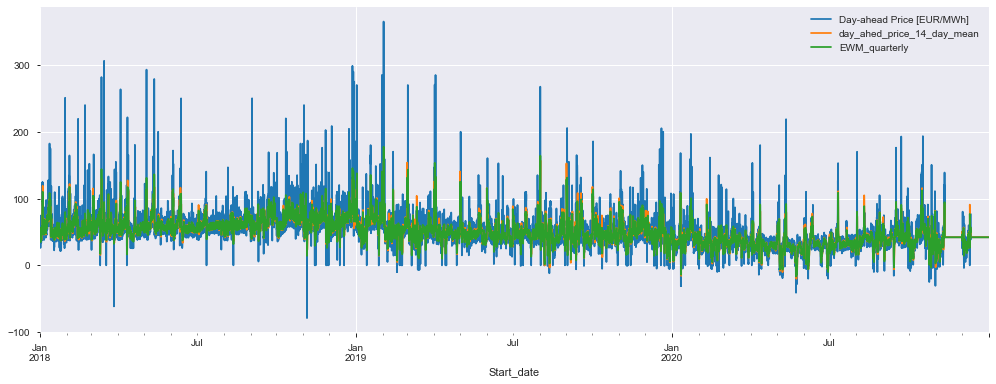

In [264]:
dap_df_new.plot(figsize=(17,6));

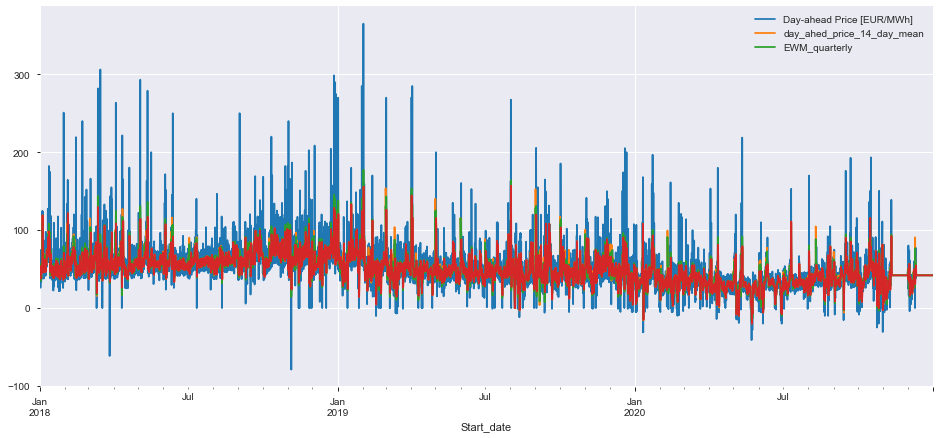

In [265]:
dap_df_new.plot(figsize=(16,7));
dap_df_new.rolling(window=14).mean()['Day-ahead Price [EUR/MWh]'].plot();

In [266]:
dap_df_new['day_ahed_price_14_day_mean'] = dap_df_new['Day-ahead Price [EUR/MWh]'].rolling(window=14).mean().round(2)

<AxesSubplot:xlabel='Start_date'>

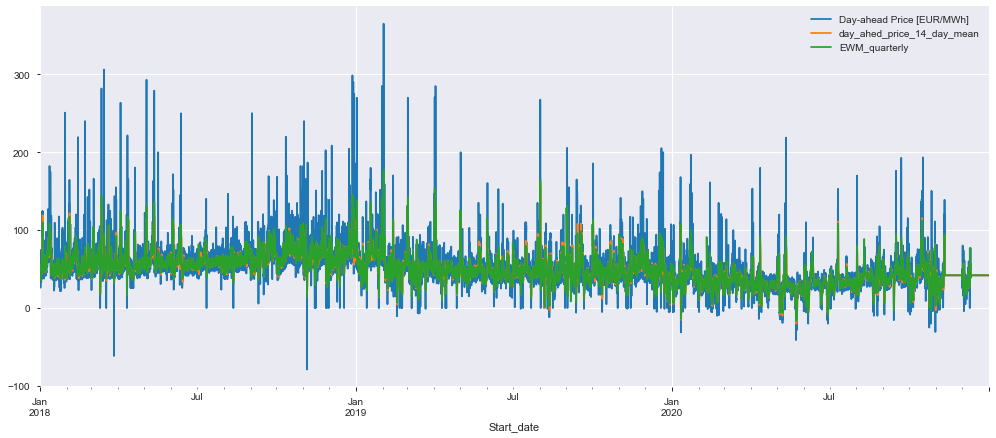

In [267]:
dap_df_new.plot(figsize=(17,7))

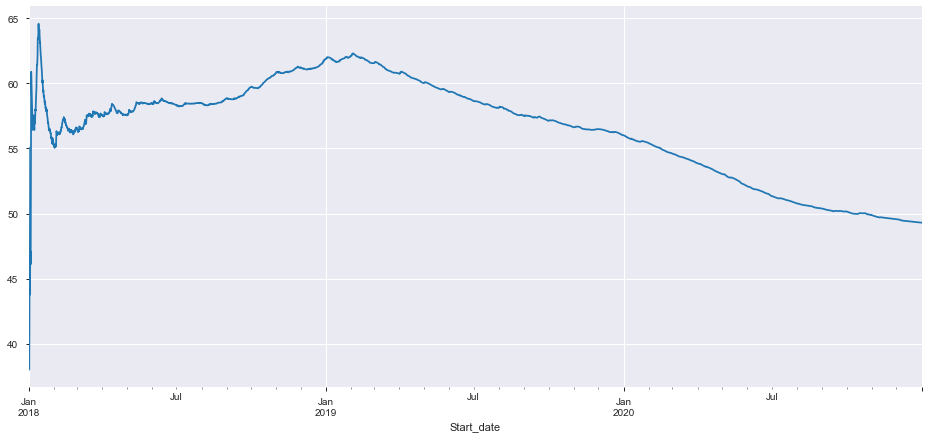

In [268]:
dap_df_new['Day-ahead Price [EUR/MWh]'].expanding().mean().plot(figsize=(16,7));

In [269]:
result = seasonal_decompose(dap_df_new['Day-ahead Price [EUR/MWh]'], model='additive')

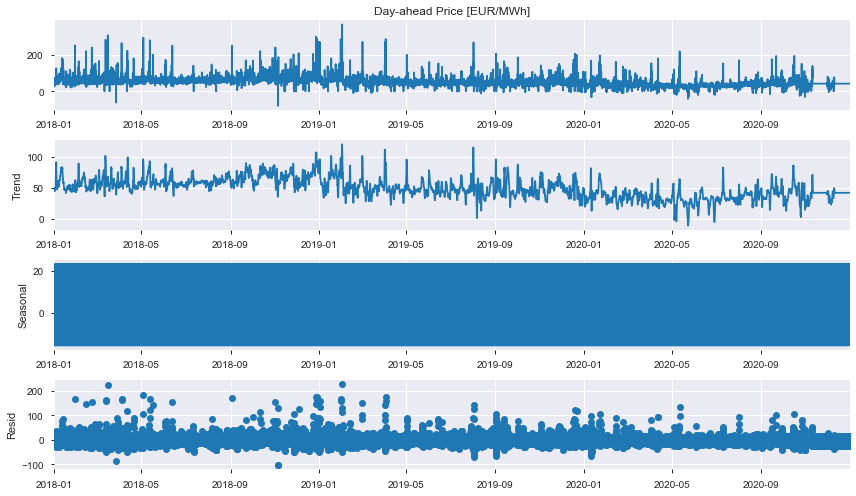

In [270]:
from pylab import rcParams
rcParams['figure.figsize'] =12,7
result.plot();

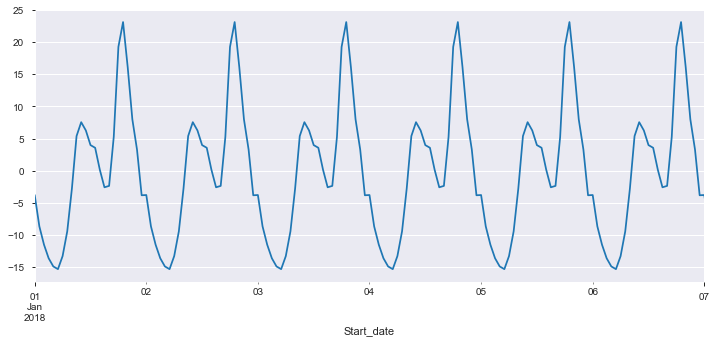

In [273]:
result.seasonal.plot(figsize = (12,5), xlim=['2018-01-01','2018-01-07']);
# test_prediction.plot(legend = True, label = 'Prediction',xlim=['2019-10-01','2019-12-31'])

In [274]:
dap_df_new['EWM_quarterly']=dap_df_new['Day-ahead Price [EUR/MWh]'].ewm(span=14).mean()

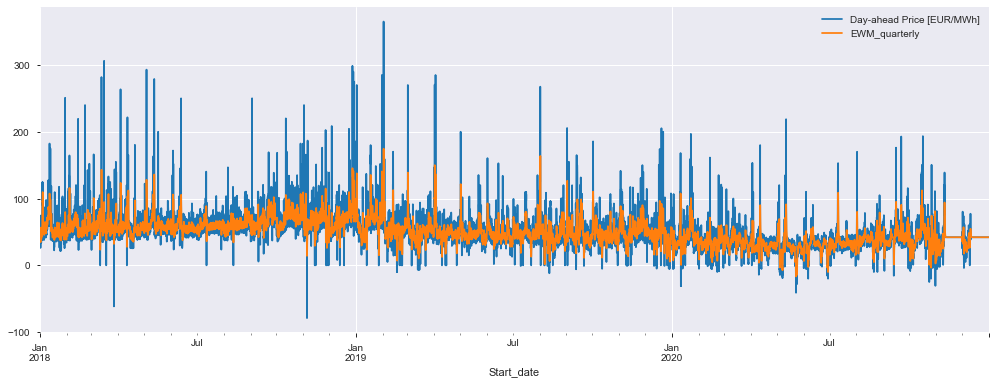

In [275]:
dap_df_new[['Day-ahead Price [EUR/MWh]','EWM_quarterly']].plot(figsize=(17,6));

In [276]:
dap_df_new

,Day-ahead Price [EUR/MWh],day_ahed_price_14_day_mean,EWM_quarterly
Start_date,,,
2018-01-01 00:00:00+00:00,55.09,NaN,55.090000
2018-01-01 01:00:00+00:00,55.08,NaN,55.084643
2018-01-01 02:00:00+00:00,39.38,NaN,49.085416
2018-01-01 03:00:00+00:00,38.56,NaN,45.865394
2018-01-01 04:00:00+00:00,38.56,NaN,43.959428
...,...,...,...
2020-12-31 19:00:00+00:00,42.03,42.03,42.030000
2020-12-31 20:00:00+00:00,42.03,42.03,42.030000
2020-12-31 21:00:00+00:00,42.03,42.03,42.030000


In [277]:
train_dap = pd.DataFrame(dap_df_new['Day-ahead Price [EUR/MWh]'].loc['2018-04-01':'2019-09-30'])
test_dap = pd.DataFrame(dap_df_new['Day-ahead Price [EUR/MWh]'].loc['2019-10-01':'2019-10-05'])

In [278]:
train_dap.tail()

,Day-ahead Price [EUR/MWh]
Start_date,
2019-09-30 19:00:00+00:00,63.00
2019-09-30 20:00:00+00:00,57.72
2019-09-30 21:00:00+00:00,49.25
2019-09-30 22:00:00+00:00,42.33
2019-09-30 23:00:00+00:00,33.00


In [279]:
test_dap

,Day-ahead Price [EUR/MWh]
Start_date,
2019-10-01 00:00:00+00:00,66.46
2019-10-01 01:00:00+00:00,65.00
2019-10-01 02:00:00+00:00,61.77
2019-10-01 03:00:00+00:00,59.16
2019-10-01 04:00:00+00:00,59.16
...,...
2019-10-05 19:00:00+00:00,86.00
2019-10-05 20:00:00+00:00,68.98
2019-10-05 21:00:00+00:00,59.47


In [280]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [281]:
fitted_model = ExponentialSmoothing(train_dap['Day-ahead Price [EUR/MWh]'],seasonal='add'
                                    ).fit()


In [282]:
test_prediction=fitted_model.forecast(120)

In [1]:
test_prediction

NameError: name 'test_prediction' is not defined

<AxesSubplot:xlabel='Start_date'>

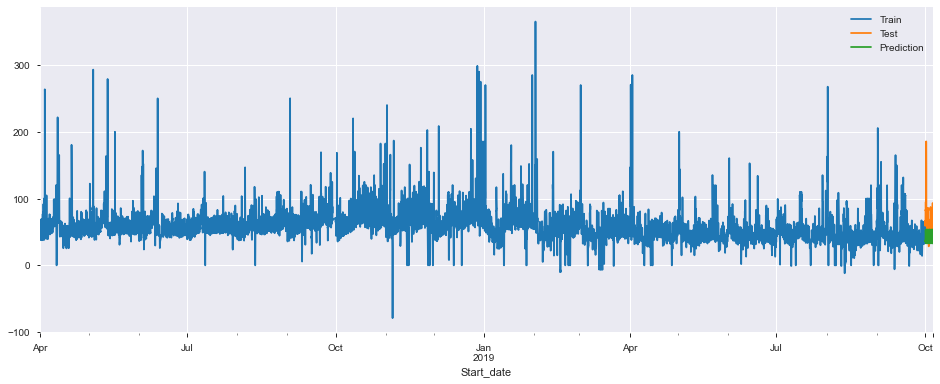

In [284]:
train_dap['Day-ahead Price [EUR/MWh]'].plot(legend = True, label = 'Train', figsize=(16,6))
test_dap['Day-ahead Price [EUR/MWh]'].plot(legend = True, label = 'Test')
test_prediction.plot(legend = True, label = 'Prediction')

<AxesSubplot:xlabel='Start_date'>

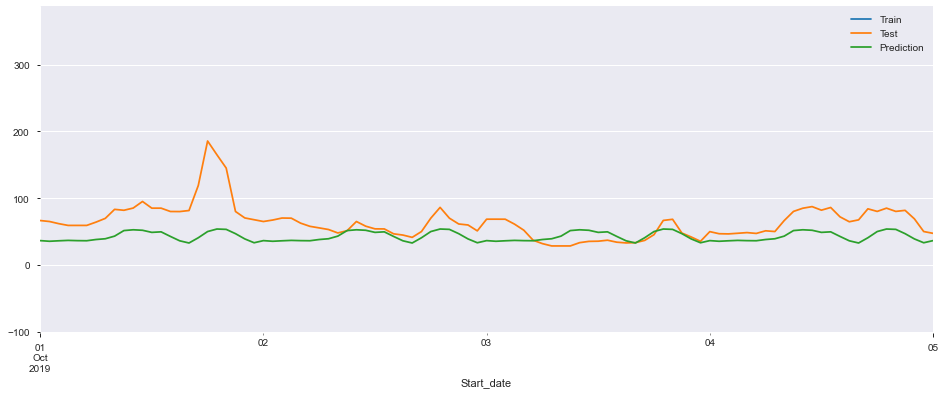

In [285]:
train_dap['Day-ahead Price [EUR/MWh]'].plot(legend = True, label = 'Train', figsize=(16,6))
test_dap['Day-ahead Price [EUR/MWh]'].plot(legend = True, label = 'Test')
test_prediction.plot(legend = True, label = 'Prediction',xlim=['2019-10-01','2019-10-05'])

In [286]:
test_dap['Day-ahead Price [EUR/MWh]'].describe()

count    120.000000
mean      63.684583
std       24.127097
min       28.420000
25%       47.370000
50%       61.535000
75%       77.717500
max      185.560000
Name: Day-ahead Price [EUR/MWh], dtype: float64

In [287]:
mean_absolute_error(test_dap['Day-ahead Price [EUR/MWh]'],test_prediction)

23.471478190166028

In [288]:
mean_squared_error(test_dap['Day-ahead Price [EUR/MWh]'],test_prediction)

933.2578645685729

In [289]:
np.sqrt(mean_squared_error(test_dap['Day-ahead Price [EUR/MWh]'],test_prediction))
# The RMSE value of 432.34 is prettey far from the test data standard deviation value of 297.68 so we can say that our
# prediction is not good enough.

30.549269460472747

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
acf(dap_df_new['Day-ahead Price [EUR/MWh]'])

array([1.        , 0.87694494, 0.72769505, 0.59961955, 0.51015093,
       0.44539689, 0.39970007, 0.36693326, 0.34171614, 0.31989383,
       0.29558134, 0.2743057 , 0.25844598, 0.25304581, 0.25312718,
       0.25659648, 0.25576068, 0.25652708, 0.26772936, 0.28814562,
       0.32394242, 0.37777292, 0.4529187 , 0.53053863, 0.56768324,
       0.52576326, 0.44482501, 0.36649311, 0.30871161, 0.26973694,
       0.24386267, 0.2275565 , 0.22052343, 0.21617249, 0.20704464,
       0.19695634, 0.18801008, 0.1875663 , 0.19267091, 0.19716559,
       0.19815092])

In [292]:
pacf_yw(dap_df_new['Day-ahead Price [EUR/MWh]'],nlags= 40, method='mle')

array([ 1.00000000e+00,  8.76944942e-01, -1.78974814e-01,  1.88290846e-02,
        7.19463581e-02,  2.18857856e-02,  3.74848839e-02,  3.29824299e-02,
        2.34343039e-02,  1.70626518e-02, -4.43110649e-03,  2.16208217e-02,
        2.31393348e-02,  4.44578805e-02,  2.77965930e-02,  3.16750753e-02,
        5.51704217e-03,  3.65297176e-02,  6.93655443e-02,  6.17494707e-02,
        1.07683683e-01,  1.36901701e-01,  1.81047402e-01,  1.42113482e-01,
       -1.32024287e-02, -1.93765998e-01, -8.96432468e-02, -2.85969409e-02,
       -1.38316138e-02, -9.09945304e-03, -6.29027529e-03,  3.48531457e-03,
        2.76824627e-02,  1.68593520e-02, -2.52460386e-04,  1.03303636e-02,
       -1.12869425e-03,  2.17726570e-02,  1.59357832e-02,  5.66300553e-03,
        7.93192211e-03])

In [293]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

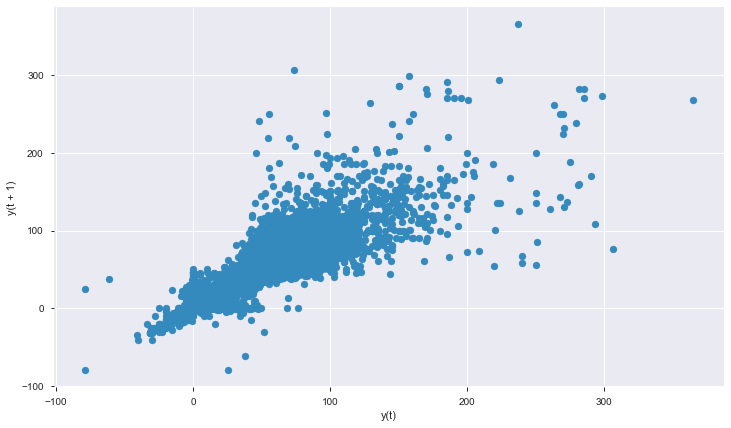

In [294]:
lag_plot(dap_df_new['Day-ahead Price [EUR/MWh]'])

In [295]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

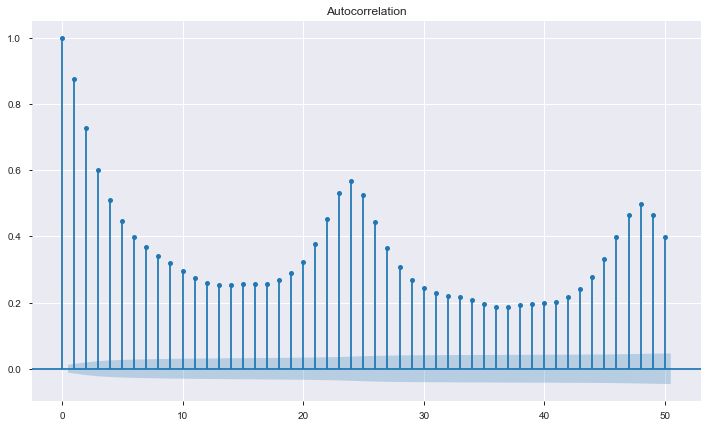

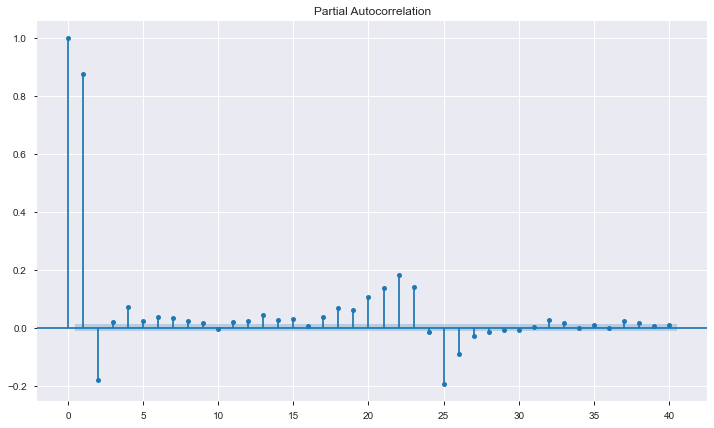

In [296]:
plot_acf(dap_df_new['Day-ahead Price [EUR/MWh]'],lags=50);
plot_pacf(dap_df_new['Day-ahead Price [EUR/MWh]'],lags=40);

In [297]:
from statsmodels.tsa.ar_model import AR, ARResults

In [298]:
import warnings
warnings.filterwarnings('ignore')

In [299]:
train_dap_ar = train_dap['Day-ahead Price [EUR/MWh]']

In [300]:
train_dap_ar=pd.DataFrame(data=train_dap_ar)

In [301]:
test_dap_ar= test_dap['Day-ahead Price [EUR/MWh]']

In [302]:
test_dap_ar=pd.DataFrame(data=test_dap_ar)

In [303]:
ar_model = AR(train_dap_ar['Day-ahead Price [EUR/MWh]'])

In [305]:
ar1_fit = ar_model.fit(maxlag = 1)

In [306]:
ar1_fit.params

const                           8.348508
L1.Day-ahead Price [EUR/MWh]    0.853636
dtype: float64

In [307]:
pred_start_date= test_dap_ar.index[0]
pred_end_date = test_dap_ar.index[-1]

In [308]:
prediction_AR1= ar1_fit.predict(start=pred_start_date, end =pred_end_date)

In [309]:
prediction_AR1

2019-10-01 00:00:00+00:00    36.518503
2019-10-01 01:00:00+00:00    39.522024
2019-10-01 02:00:00+00:00    42.085938
2019-10-01 03:00:00+00:00    44.274588
2019-10-01 04:00:00+00:00    46.142899
                               ...    
2019-10-05 19:00:00+00:00    57.039433
2019-10-05 20:00:00+00:00    57.039433
2019-10-05 21:00:00+00:00    57.039433
2019-10-05 22:00:00+00:00    57.039433
2019-10-05 23:00:00+00:00    57.039433
Freq: H, Length: 120, dtype: float64

<AxesSubplot:xlabel='Start_date'>

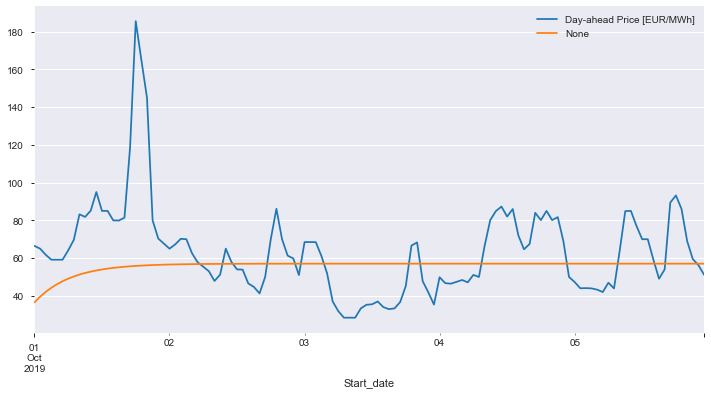

In [310]:
test_dap_ar.plot(figsize=(12,6), legend= True)
prediction_AR1.plot(legend =True)

In [311]:
test_dap_ar.mean()

Day-ahead Price [EUR/MWh]    63.684583
dtype: float64

In [312]:
ar_model2 = AR(train_dap_ar['Day-ahead Price [EUR/MWh]'])

In [313]:
ar_fit2= ar_model2.fit(maxlag=2)

In [314]:
ar_fit2.params

const                           10.155523
L1.Day-ahead Price [EUR/MWh]     1.038257
L2.Day-ahead Price [EUR/MWh]    -0.216289
dtype: float64

In [315]:
prediction_AR2= ar_fit2.predict(start=pred_start_date, end =pred_end_date)


In [316]:
prediction_AR2

2019-10-01 00:00:00+00:00    35.262487
2019-10-01 01:00:00+00:00    39.629503
2019-10-01 02:00:00+00:00    43.674235
2019-10-01 03:00:00+00:00    46.929169
2019-10-01 04:00:00+00:00    49.433795
                               ...    
2019-10-05 19:00:00+00:00    57.043185
2019-10-05 20:00:00+00:00    57.043185
2019-10-05 21:00:00+00:00    57.043185
2019-10-05 22:00:00+00:00    57.043185
2019-10-05 23:00:00+00:00    57.043185
Freq: H, Length: 120, dtype: float64

<AxesSubplot:xlabel='Start_date'>

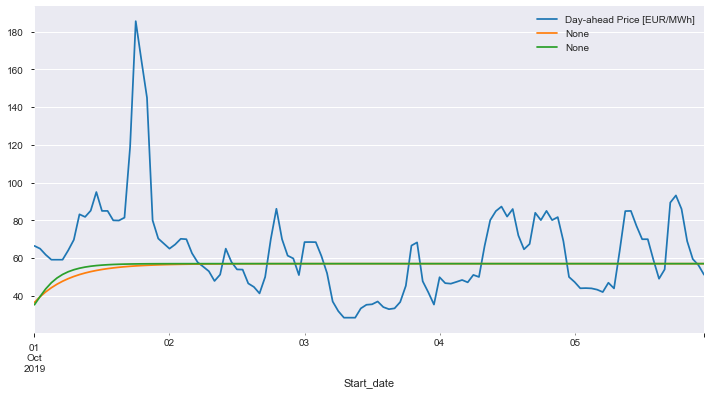

In [318]:
test_dap_ar.plot(figsize=(12,6), legend= True)
prediction_AR1.plot(legend =True)
prediction_AR2.plot(legend =True)

In [319]:
ar_new_model = AR(train_dap_ar['Day-ahead Price [EUR/MWh]'])

In [320]:
ar_newfit = ar_new_model.fit(ic='t-stat')

In [321]:
ar_newfit.params

const                            4.796164
L1.Day-ahead Price [EUR/MWh]     0.943572
L2.Day-ahead Price [EUR/MWh]    -0.162784
L3.Day-ahead Price [EUR/MWh]    -0.010701
L4.Day-ahead Price [EUR/MWh]     0.059467
L5.Day-ahead Price [EUR/MWh]    -0.003846
L6.Day-ahead Price [EUR/MWh]     0.000051
L7.Day-ahead Price [EUR/MWh]     0.022737
L8.Day-ahead Price [EUR/MWh]    -0.025606
L9.Day-ahead Price [EUR/MWh]     0.024799
L10.Day-ahead Price [EUR/MWh]   -0.031754
L11.Day-ahead Price [EUR/MWh]    0.013247
L12.Day-ahead Price [EUR/MWh]    0.000336
L13.Day-ahead Price [EUR/MWh]    0.001916
L14.Day-ahead Price [EUR/MWh]   -0.007170
L15.Day-ahead Price [EUR/MWh]    0.027757
L16.Day-ahead Price [EUR/MWh]   -0.023518
L17.Day-ahead Price [EUR/MWh]   -0.021800
L18.Day-ahead Price [EUR/MWh]    0.008831
L19.Day-ahead Price [EUR/MWh]   -0.015347
L20.Day-ahead Price [EUR/MWh]    0.016302
L21.Day-ahead Price [EUR/MWh]   -0.034613
L22.Day-ahead Price [EUR/MWh]    0.058260
L23.Day-ahead Price [EUR/MWh]    0

In [322]:
prediction_AR6 = ar_newfit.predict(start=pred_start_date, end =pred_end_date)

In [323]:
prediction_AR6.mean()

52.505617788278485

In [324]:
labels = ['AR1','AR2','AR6']
preds = [prediction_AR1,prediction_AR2,prediction_AR6]

In [325]:
for i in range (3):
    error =  mean_squared_error(test_dap_ar['Day-ahead Price [EUR/MWh]'],preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :666.1627824891732
AR2 MSE was :644.9874505424293
AR6 MSE was :710.1038504982381


<AxesSubplot:xlabel='Start_date'>

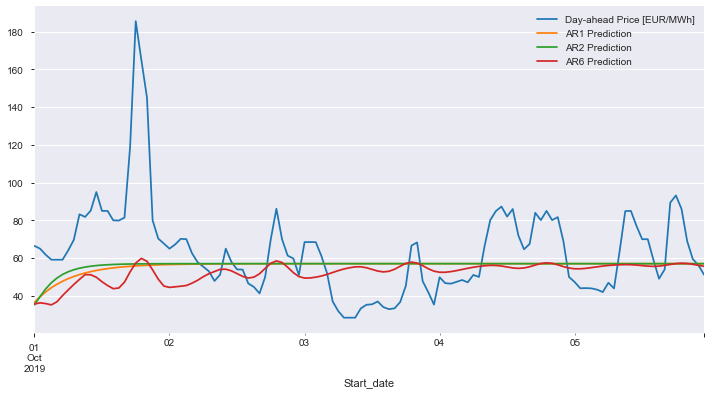

In [326]:
test_dap_ar.plot(figsize=(12,6), legend= True)
prediction_AR1.plot(legend =True, label='AR1 Prediction')
prediction_AR2.plot(legend =True, label='AR2 Prediction')
prediction_AR6.plot(legend =True, label='AR6 Prediction')

In [327]:
from statsmodels.tsa.stattools import adfuller

In [328]:
adfuller(dap_df_new['Day-ahead Price [EUR/MWh]'])

(-10.445264141989778,
 1.4858174906711485e-18,
 49,
 26254,
 {'1%': -3.430599102593299,
  '5%': -2.8616500960359854,
  '10%': -2.5668286008605627},
 197896.53120209376)

In [329]:
dickyfuller_test = dap_df_new['Day-ahead Price [EUR/MWh]'].round()
dickyfuller_out = pd.Series(dickyfuller_test[0:4], index=['ADF Test statistic','p-value','# Lag-Used','# Observations'])


In [330]:
dickyfuller_test

Start_date
2018-01-01 00:00:00+00:00    55.0
2018-01-01 01:00:00+00:00    55.0
2018-01-01 02:00:00+00:00    39.0
2018-01-01 03:00:00+00:00    39.0
2018-01-01 04:00:00+00:00    39.0
                             ... 
2020-12-31 19:00:00+00:00    42.0
2020-12-31 20:00:00+00:00    42.0
2020-12-31 21:00:00+00:00    42.0
2020-12-31 22:00:00+00:00    42.0
2020-12-31 23:00:00+00:00    42.0
Freq: H, Name: Day-ahead Price [EUR/MWh], Length: 26304, dtype: float64

In [83]:
# for key,val in dickyfuller_test[4].items():
#     dickyfuller_out[f'critical value ({key})'] = val

In [331]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [332]:
dap_mont_df = dap_df.resample('M').sum().round(2)

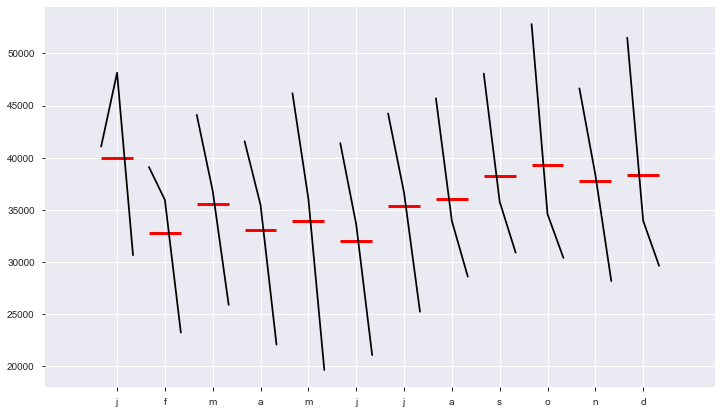

In [333]:
month_plot(dap_mont_df['Day-ahead Price [EUR/MWh]']);

In [87]:
dap_qrtr_df = dap_df.resample('Q').sum().round(2)

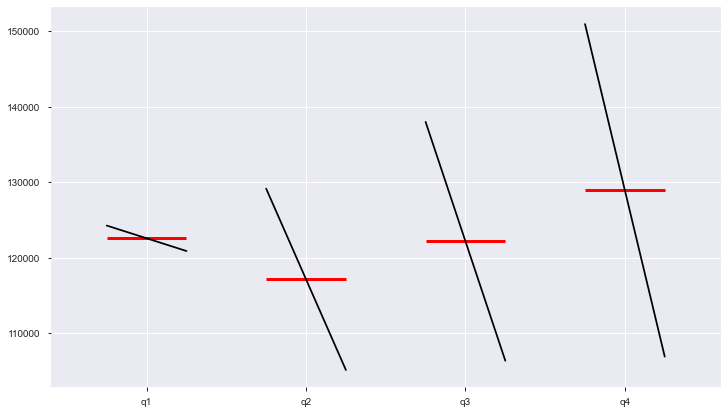

In [334]:
quarter_plot(dap_qrtr_df['Day-ahead Price [EUR/MWh]']);

In [89]:
# ! pip install pmdarima

In [335]:
from pmdarima import auto_arima

In [336]:
import warnings
warnings.filterwarnings('ignore')

In [337]:
step_wise_fit = auto_arima(dap_df_new['Day-ahead Price [EUR/MWh]'],start_p=0, start_q=0, max_p=9, max_q=5, m=7, seasonal= True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=205366.421, Time=12.68 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=205543.658, Time=0.86 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=205232.500, Time=4.47 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=205179.285, Time=9.04 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=205541.658, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=205193.043, Time=4.63 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=205065.847, Time=23.44 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=205179.806, Time=10.36 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=205046.569, Time=35.18 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=205176.055, Time=15.85 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=205027.353, Time=83.96 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=205050.058, Time=51.50 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=205311.485, Time=38.12 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=204998.935, Time=103.42

MemoryError: Unable to allocate 65.0 MiB for an array with shape (18, 18, 26305) and data type float64

In [93]:
step_wise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -5187.450
Date:                Fri, 06 Nov 2020   AIC                          10384.901
Time:                        00:19:02   BIC                          10407.859
Sample:                             0   HQIC                         10393.759
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2725      0.031      8.803      0.000       0.212       0.333
ar.L2          0.0802      0.037      2.156      0.031       0.007       0.153
ar.L3          0.1129      0.035      3.185      0.001       0.043       0.182
ma.L1         -0.9738      0.011    -91.694      0.000      -0.995      -0.953
sigma2      8.847e+04   3036.893     29.131      0.000    8.25e+04    9.44e+04
===================================================================================
Ljung-Box (Q):                       80.95   Jarque-Bera (JB):               498.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults 

# ARMA

In [102]:
adfuller(dap_df_new['Day-ahead Price [EUR/MWh]'])
# Strong evidence against NULL Hypothesis.
# Reject Null hypothesis
# Data has no unit root andis stationary

(-6.602975686123939,
 6.663934704701134e-09,
 5,
 724,
 {'1%': -3.4394144152232995,
  '5%': -2.8655403100177566,
  '10%': -2.5689002207655443},
 10111.295750151548)

In [ ]:
auto_arima(dap_df_new['Day-ahead Price [EUR/MWh]'], start_p=0, start_q=0, max_p=9, max_q=5,seasonal= False).summary()

In [103]:
from pmdarima.arima import ADFTest

In [104]:
dap_adf_test = ADFTest(alpha=0.05)
dap_adf_test.should_diff(dap_df_new['Day-ahead Price [EUR/MWh]'])

(0.01, False)

In [106]:
step_wise_model = auto_arima(train_dap_ar,start_p=0,start_q=0, max_p=9, max_q=5, start_P=0, start_Q=0,m=7, seasonal= True)

In [164]:
model = ARIMA(train_dap_ar,order=(3,0,38), freq='D')

<bound method LikelihoodModel.information of <statsmodels.tsa.arima_model.ARMA object at 0x000002518358F860>>

In [107]:
step_wise_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  638
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -4539.522
Date:                Wed, 04 Nov 2020   AIC                           9089.044
Time:                        21:23:56   BIC                           9111.328
Sample:                             0   HQIC                          9097.695
                                - 638                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2642      0.033      8.105      0.000       0.200       0.328
ar.L2          0.0905      0.039      2.293      0.022       0.013       0.168
ar.L3          0.0986      0.038      2.586      0.010       0.024       0.173
ma.L1         -0.9713      0.012    -81.217      0.000      -0.995      -0.948
sigma2      9.033e+04   3261.296     27.696      0.000    8.39e+04    9.67e+04
===================================================================================
Ljung-Box (Q):                       84.79   Jarque-Bera (JB):               493.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
step_wise_fit = step_wise_model.fit(train_dap_ar['Day-ahead Price [EUR/MWh]'])

ValueError: could not broadcast input array from shape (634) into shape (38)

In [109]:
prediction_step_wise = step_wise_fit.predict(n_periods= 92)

In [110]:
prediction_step_wise

array([1056.26307177, 1077.86207418, 1100.61320823, 1110.60612959,
       1117.43415268, 1122.38516761, 1125.29623033, 1127.18645621,
       1128.43734845, 1129.22585701, 1129.73371371, 1130.06255531,
       1130.27312304, 1130.40857678, 1130.49583536, 1130.5519042 ,
       1130.58796675, 1130.61117015, 1130.6260911 , 1130.63568796,
       1130.64186106, 1130.64583133, 1130.64838494, 1130.65002742,
       1130.65108384, 1130.65176331, 1130.65220033, 1130.65248142,
       1130.65266222, 1130.6527785 , 1130.65285329, 1130.6529014 ,
       1130.65293234, 1130.65295224, 1130.65296504, 1130.65297327,
       1130.65297857, 1130.65298197, 1130.65298416, 1130.65298557,
       1130.65298648, 1130.65298706, 1130.65298744, 1130.65298768,
       1130.65298783, 1130.65298793, 1130.652988  , 1130.65298804,
       1130.65298806, 1130.65298808, 1130.65298809, 1130.6529881 ,
       1130.6529881 , 1130.65298811, 1130.65298811, 1130.65298811,
       1130.65298811, 1130.65298811, 1130.65298811, 1130.65298

In [111]:
prediction_step_wise.plot(figsize=(12,5))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<AxesSubplot:xlabel='Start_date'>

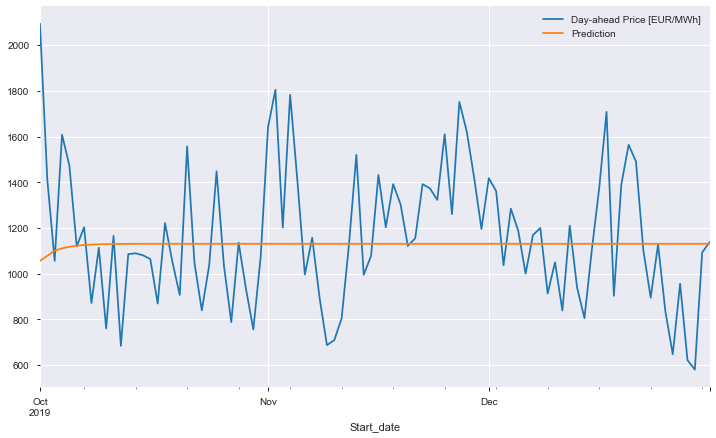

In [112]:
prediction_forecast = pd.DataFrame(prediction_step_wise, index= test_dap_ar.index,columns=['Prediction'])
pd.concat([test_dap_ar,prediction_forecast],axis=1).plot()
# future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=[‘Prediction’])

In [113]:
print ('The prediction mean value of auto arima model is : ',prediction_step_wise.mean())
print ('The test dataset mean value of',test_dap_ar.mean())

# This model predicts actually close to the mean value of our test dataset as this model has only the 
# Auto regressive and moving average component so this is quite good.

The prediction mean value of auto arima model is :  1128.329133477145
The test dataset mean value of Day-ahead Price [EUR/MWh]    1161.65163
dtype: float64


In [ ]:
# test_dap_ar.describe()

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [134]:
new_auto_arima = auto_arima(dap_df_new['Day-ahead Price [EUR/MWh]'], m=7, max_order=None, max_p=7, max_q=7,max_d= 2, max_P=4,
                           max_Q=4,max_D=2, maxiter=50, alpha=0.05, n_jobs= -1,seasonal=True, information_criterion='oob',
                           out_of_sample_size = int(len(dap_df_new)*0.2))

In [138]:
new_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  730
Model:             SARIMAX(2, 1, 3)x(2, 0, [], 7)   Log Likelihood               -5203.641
Date:                            Thu, 05 Nov 2020   AIC                          10425.281
Time:                                    00:40:12   BIC                          10466.606
Sample:                                         0   HQIC                         10441.226
                                            - 730                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8824      3.980     -0.222      0.825      -8.682       6.917
ar.L1         -1.0709      0.130     -8.253      0.000      -1.325      -0.817
ar.L2         -0.5795      0.095     -6.099      0.000      -0.766      -0.393
ma.L1          0.3584      0.121      2.959      0.003       0.121       0.596
ma.L2         -0.4015      0.101     -3.983      0.000      -0.599      -0.204
ma.L3         -0.6385      0.069     -9.294      0.000      -0.773      -0.504
ar.S.L7       -0.0663      0.043     -1.541      0.123      -0.151       0.018
ar.S.L14      -0.0802      0.042     -1.888      0.059      -0.163       0.003
sigma2       9.11e+04   3154.125     28.883      0.000    8.49e+04    9.73e+04
===================================================================================
Ljung-Box (Q):                      136.16   Jarque-Bera (JB):               477.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
model_autoarima = auto_arima(train_dap_ar['Day-ahead Price [EUR/MWh]'], seasonal=True,m=7)

In [162]:
resDiff = sm.tsa.arma_order_select_ic(train_dap_ar['Day-ahead Price [EUR/MWh]'], max_ar=10, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (10, 7) is the best.


In [173]:
sarimax_model = SARIMAX(train_dap_ar['Day-ahead Price [EUR/MWh]'], order=(3,0,38))

In [174]:
sarimax_model_fit = sarimax_model.fit()

In [1]:
sarimax_model_fit.summary()

NameError: name 'sarimax_model_fit' is not defined

In [175]:
prediction_sarimax = sarimax_model_fit.predict(start=pred_start_date, end =pred_end_date)

<AxesSubplot:xlabel='Start_date'>

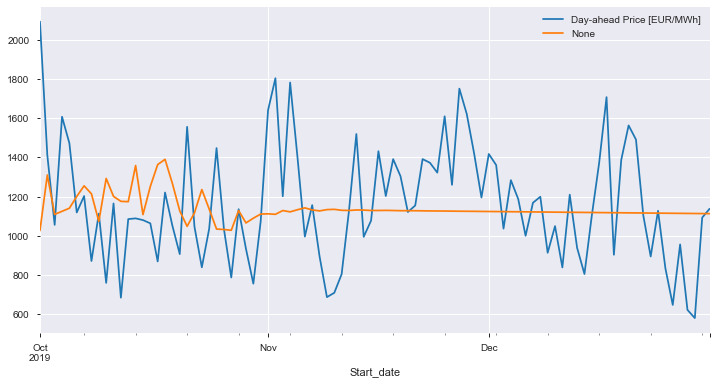

In [206]:
test_dap_ar.plot(figsize=(12,6), legend= True)
prediction_sarimax.plot(legend =True)

In [197]:
arma_model = ARIMA(train_dap_ar['Day-ahead Price [EUR/MWh]'], order=(3,1,2))

In [198]:
arma_model_fit = arma_model.fit()

In [199]:
prediction_arima = arma_model_fit.predict(start=pred_start_date, end =pred_end_date)

In [200]:
prediction_arima

2019-10-01 00:00:00+00:00    12.238728
2019-10-02 00:00:00+00:00    19.122065
2019-10-03 00:00:00+00:00    21.425484
2019-10-04 00:00:00+00:00     8.375300
2019-10-05 00:00:00+00:00     5.829063
                               ...    
2019-12-27 00:00:00+00:00    -0.429429
2019-12-28 00:00:00+00:00    -0.429429
2019-12-29 00:00:00+00:00    -0.429429
2019-12-30 00:00:00+00:00    -0.429429
2019-12-31 00:00:00+00:00    -0.429429
Freq: D, Length: 92, dtype: float64

<AxesSubplot:xlabel='Start_date'>

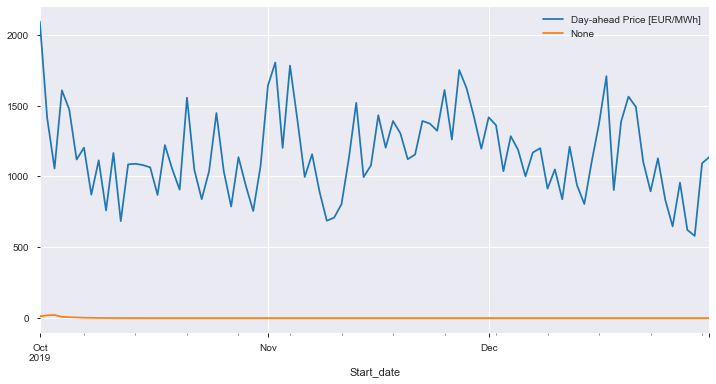

In [201]:
test_dap_ar.plot(figsize=(12,6), legend= True)
prediction_arima.plot(legend =True)

# Reading Demand data


In [ ]:
dm_load = pd.read_csv('C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Demand data/Total Load - Day Ahead _ Actual_201901010000-202001010000.csv',sep=',')
# dm_load

In [ ]:
dm_df = pd.DataFrame(data = dm_load)

In [ ]:
dm_df.rename(columns={'Time (CET)':'MTU'},inplace=True)

In [ ]:
dm_df[['Start_date','End_date']] = dm_df.MTU.str.split("-",expand=True,)


In [ ]:
dm_df.info()

In [ ]:
dm_df['Start_date'] = pd.to_datetime(dm_df['Start_date'], utc=True, infer_datetime_format=True)

dm_df = dm_df.set_index('Start_date')
dm_df

In [ ]:
dm_df.drop(columns={'MTU','End_date'}, inplace=True)

In [ ]:
dm_df = dm_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
dm_df.info()

In [ ]:
# Finding NaNs and duplicates values.

print('There are',dm_df.isnull().values.sum(), 'null values')

print('There are',dm_df.duplicated(keep='first').values.sum(), 'duplicate values')


In [ ]:
dm_df.isnull().sum()

In [ ]:
# delete total null columns
dm_df.dropna(how='all', axis=1,inplace=True)

In [ ]:
dm_df = dm_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [ ]:
dm_df.isnull().sum()

In [ ]:
# resampling data to collect daily data;
dm_df_new = dm_df.resample('D').sum().round(2)
dm_df_new

In [ ]:
final_df = pd.concat([df_new, wf_df_new,ic_df_new,dap_df_new,dm_df_new], axis=1)

In [ ]:
final_df

In [ ]:
# Decomposition based on Actual load of Electricity
output = sm.tsa.seasonal_decompose(final_df['Actual Total Load [MW] - BZN|IE(SEM)'], model='additive',period=24)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
output.observed.plot(ax=ax1, title='Observed')
output.trend.plot(ax=ax2, title='Trend')
output.resid.plot(ax=ax3, title='Residual')
output.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [ ]:
# Decomposition based on Day ahead price of Electricity
output = sm.tsa.seasonal_decompose(final_df['Day-ahead Price [EUR/MWh]'], model='additive',period=24)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
output.observed.plot(ax=ax1, title='Observed')
output.trend.plot(ax=ax2, title='Trend')
output.resid.plot(ax=ax3, title='Residual')
output.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()